In [1]:
# import dependencies
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns

In [2]:
# add csv file
data_salaries_cleaned_csv = Path("../Resources/data_salaries_cleaned.csv")

In [3]:
# read csv
data_salaries_cleaned = pd.read_csv(data_salaries_cleaned_csv)
data_salaries_cleaned.head()

,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_size
0,2023,MI,FT,Data Scientist,150000,0,M
1,2023,MI,FT,Data Scientist,125000,0,M
2,2023,SE,FT,Data Scientist,150000,100,M
3,2023,SE,FT,Data Scientist,130000,100,M
4,2023,SE,FT,Data Engineer,190000,0,M


In [4]:
# create function to filter out outliers
def filter_outliers(data_frame):
    quartiles = data_frame["salary"].quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    data_frame = data_frame.loc[(data_frame["salary"]>lower_bound) & (data_frame["salary"]<upper_bound)]
    return data_frame

## Data for Top 4 Job Titles Combined
### Data Analyst, Data Scientist, Data Engineer, Machine Learning Engineer

In [5]:
data_top_4 = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Analyst")|
                                       (data_salaries_cleaned["job_title"]=="Data Scientist")|
                                      (data_salaries_cleaned["job_title"]=="Data Engineer")|
                                      (data_salaries_cleaned["job_title"]=="Data Analyst")]
data_top_4 = filter_outliers(data_top_4)

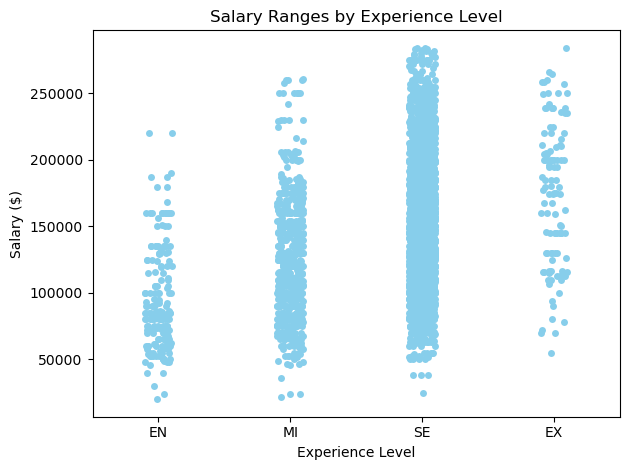

In [6]:
sns.stripplot(x="experience_level", y="salary", data=data_top_4, order=["EN", "MI", "SE", "EX"], color="skyblue")
plt.title("Salary Ranges by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary ($)")
plt.tight_layout()
plt.savefig("Output/top4scatterplot.png")

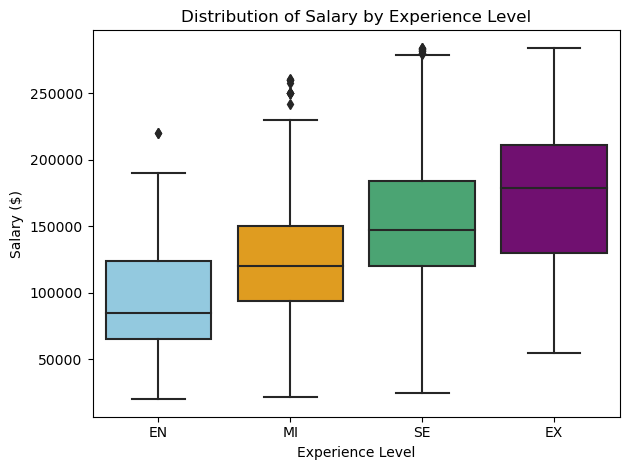

In [7]:
palette=["skyblue", "orange", "mediumseagreen", "purple"]
sns.boxplot(x="experience_level", y="salary", data=data_top_4, order=["EN", "MI", "SE", "EX"], palette=palette)
plt.title("Distribution of Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary ($)")
plt.tight_layout()
plt.savefig("Output/top4boxplot.png")

## Data Broken Down by Job Title
### Data Analyst, Data Scientist, Data Engineer, Machine Learning Engineer

In [8]:
# filter by job title to create 4 new dfs
data_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Engineer")]
data_scientists = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Scientist")]
data_analysts = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Data Analyst")]
machine_learning_engineers = data_salaries_cleaned.loc[(data_salaries_cleaned["job_title"]=="Machine Learning Engineer")]

In [9]:
# filter outliers for each job title
data_analysts = filter_outliers(data_analysts)
data_scientists = filter_outliers(data_scientists)
data_engineers = filter_outliers(data_engineers)
machine_learning_engineers = filter_outliers(machine_learning_engineers)

In [45]:
# build function to find & display average starting salary for each job title
def starting_salary(data_frame, job_title):
    data_frame_en = data_frame.loc[(data_frame["experience_level"])=="EN"]
    average = round(data_frame_en["salary"].mean(),2)
    print(f"{job_title} have an average starting salary of ${average}")

In [47]:
starting_salary(data_analysts, "Data Analysts")
starting_salary(data_scientists, "Data Scientists")
starting_salary(data_engineers, "Data Engineers")
starting_salary(machine_learning_engineers, "Machine Learning Engineers")

Data Analysts have an average starting salary of $75685.43
Data Scientists have an average starting salary of $106415.89
Data Engineers have an average starting salary of $109101.88
Machine Learning Engineers have an average starting salary of $139916.45


In [10]:
# build function to create scatter plot for each job title
def stripplot(data_frame, job_title):
    sns.stripplot(x="experience_level", y="salary", data=data_frame, order=["EN", "MI", "SE", "EX"], color="skyblue")
    plt.title(f"{job_title} Salary Ranges by Experience Level")
    plt.xlabel("Experience Level")
    plt.ylabel("Salary ($)")
    plt.tight_layout()
    plt.savefig(f"Output/{job_title}_ranges.png")

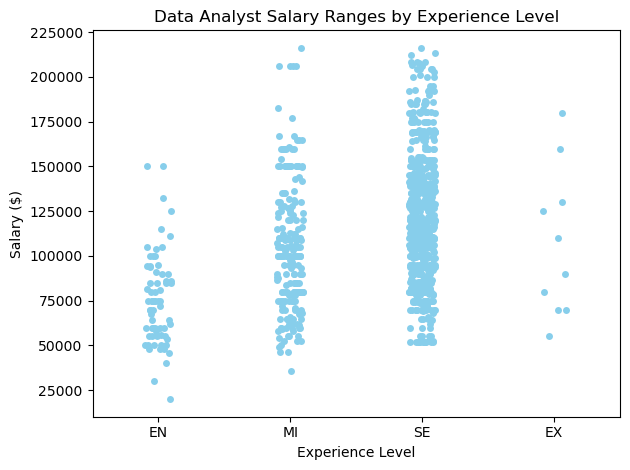

In [11]:
# stripplots
stripplot(data_analysts, "Data Analyst")

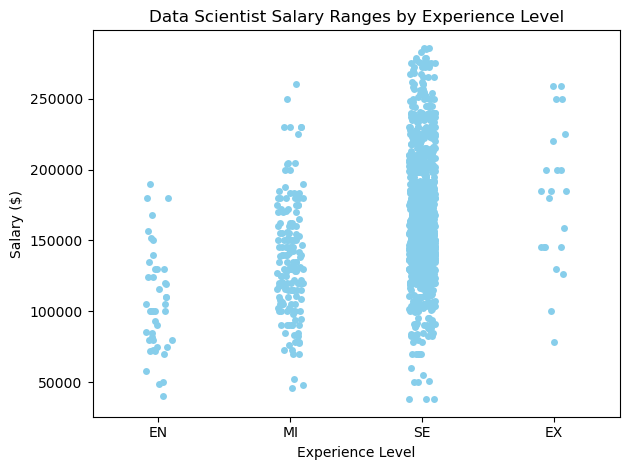

In [12]:
stripplot(data_scientists, "Data Scientist")

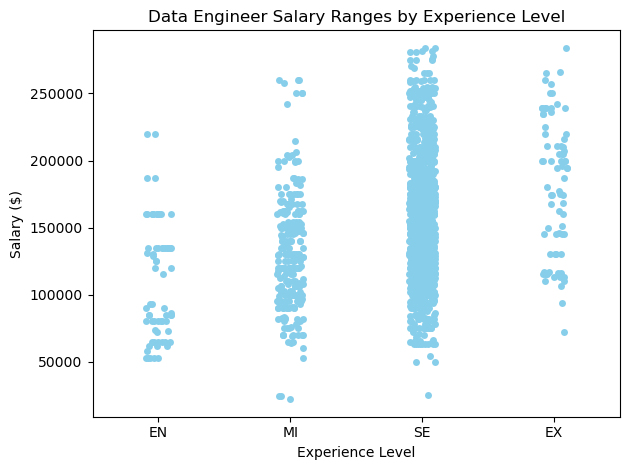

In [13]:
stripplot(data_engineers, "Data Engineer")

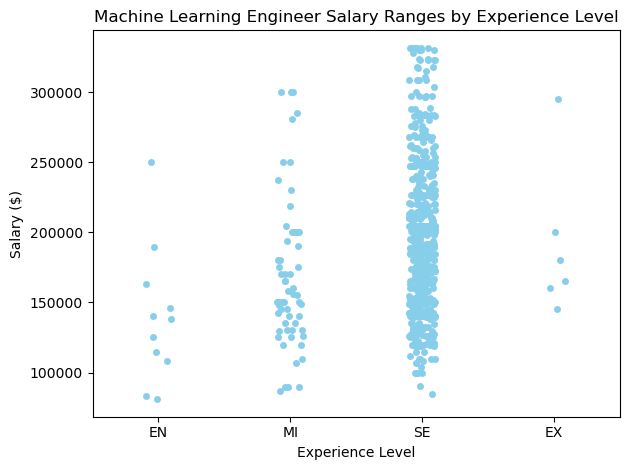

In [14]:
stripplot(machine_learning_engineers, "Machine Learning Engineer")

In [15]:
# get average for each experience level in each job title
avg_data_engineer_salaries = data_engineers.groupby(["experience_level"])["salary"].mean()
avg_data_scientist_salaries = data_scientists.groupby(["experience_level"])["salary"].mean()
avg_data_analyst_salaries = data_analysts.groupby(["experience_level"])["salary"].mean()
avg_machine_learning_engineer_salaries = machine_learning_engineers.groupby(["experience_level"])["salary"].mean()

In [16]:
avg_salaries_by_experience_level = pd.DataFrame({"Data Analyst": avg_data_analyst_salaries,
                                            "Data Scientist": avg_data_scientist_salaries,
                                            "Data Engineer": avg_data_engineer_salaries,
                                            "Machine Learning Engineer": avg_machine_learning_engineer_salaries})

avg_salaries_by_experience_level = avg_salaries_by_experience_level.reindex(["EN", "MI", "SE", "EX"])
avg_salaries_by_experience_level

,Data Analyst,Data Scientist,Data Engineer,Machine Learning Engineer
experience_level,,,,
EN,75685.428571,106415.886364,109101.880597,139916.454545
MI,103622.379913,136249.036145,129740.720000,168484.183333
SE,119998.592330,167551.901840,156680.738880,194317.566558
EX,107000.000000,180481.818182,181023.461538,190950.000000


In [17]:
# build function to create bar graphs
def bargraph(job_title):
    avg_salaries_by_experience_level[job_title].plot(kind="bar", title=f"Average Salary by Experience Level: {job_title}",
                                                     ylabel="Average Salary ($)", xlabel="Experience Level", color="skyblue")
    plt.savefig(f"Output/{job_title}_average.png")
    plt.tight_layout()
    plt.show()

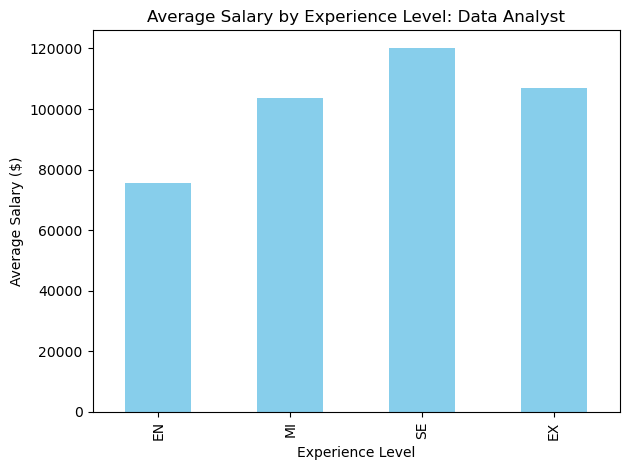

In [18]:
bargraph("Data Analyst")

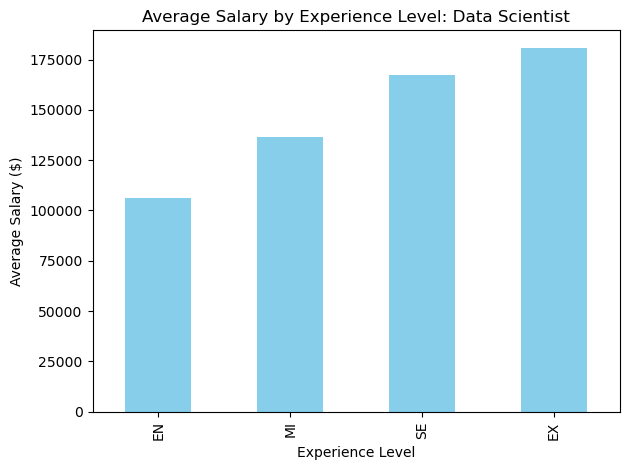

In [19]:
bargraph("Data Scientist")

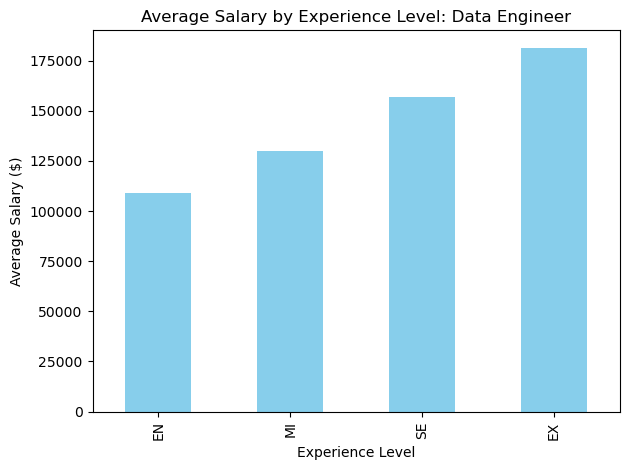

In [20]:
bargraph("Data Engineer")

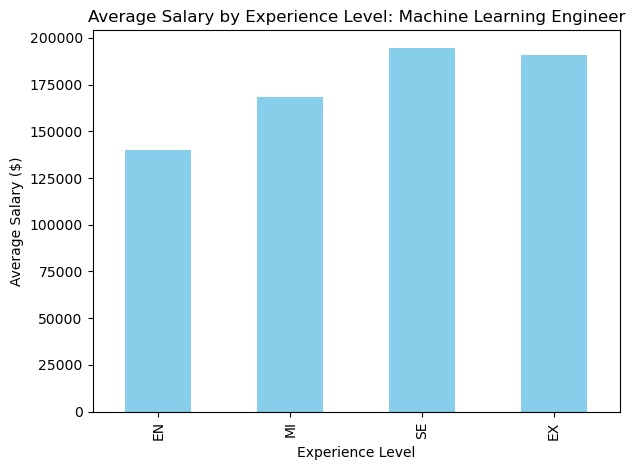

In [21]:
bargraph("Machine Learning Engineer")

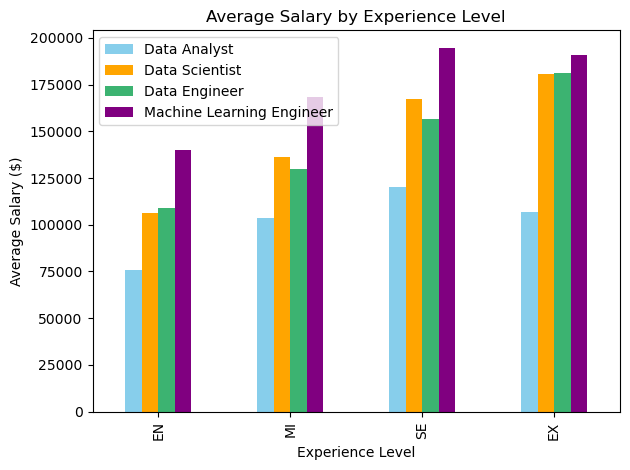

In [22]:
colors=["skyblue", "orange", "mediumseagreen", "purple"]
avg_salaries_by_experience_level.plot(kind="bar", title="Average Salary by Experience Level", 
                                      ylabel="Average Salary ($)", xlabel="Experience Level", color=colors)
plt.savefig("Output/top4_average.png")
plt.tight_layout()
plt.show()

In [23]:
for col in avg_salaries_by_experience_level.columns:
    name = f"{str(col)} Salary Increase"
    avg_salaries_by_experience_level[name] = avg_salaries_by_experience_level[col].diff()

In [24]:
avg_salaries_by_experience_level

,Data Analyst,Data Scientist,Data Engineer,Machine Learning Engineer,Data Analyst Salary Increase,Data Scientist Salary Increase,Data Engineer Salary Increase,Machine Learning Engineer Salary Increase
experience_level,,,,,,,,
EN,75685.428571,106415.886364,109101.880597,139916.454545,NaN,NaN,NaN,NaN
MI,103622.379913,136249.036145,129740.720000,168484.183333,27936.951341,29833.149781,20638.839403,28567.728788
SE,119998.592330,167551.901840,156680.738880,194317.566558,16376.212417,31302.865696,26940.018880,25833.383225
EX,107000.000000,180481.818182,181023.461538,190950.000000,-12998.592330,12929.916341,24342.722659,-3367.566558


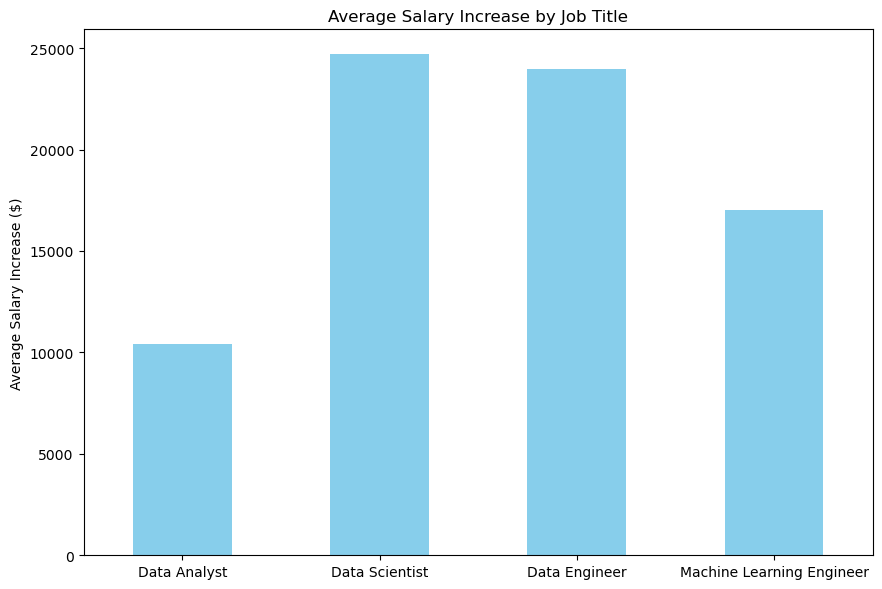

In [25]:
avg_salary_increase_DA = avg_salaries_by_experience_level["Data Analyst Salary Increase"].mean()
avg_salary_increase_DS = avg_salaries_by_experience_level["Data Scientist Salary Increase"].mean()
avg_salary_increase_DE = avg_salaries_by_experience_level["Data Engineer Salary Increase"].mean()
avg_salary_increase_MLE = avg_salaries_by_experience_level["Machine Learning Engineer Salary Increase"].mean()

avg_salary_increases = pd.DataFrame({"Data Analyst": [avg_salary_increase_DA],
                                        "Data Scientist": [avg_salary_increase_DS],
                                        "Data Engineer": [avg_salary_increase_DE],
                                        "Machine Learning Engineer": [avg_salary_increase_MLE]}).T
avg_salary_increases.plot(kind="bar", title="Average Salary Increase by Job Title", legend=False,figsize=(9,6), 
                          color="skyblue", rot=0)
plt.ylabel("Average Salary Increase ($)")
plt.savefig("Output/top4_average_increases.png")
plt.tight_layout()
plt.show()

In [26]:
# print average salary increases for output
avg_salary_increase_DA = round(avg_salaries_by_experience_level["Data Analyst Salary Increase"].mean(),2)
avg_salary_increase_DS = round(avg_salaries_by_experience_level["Data Scientist Salary Increase"].mean(),2)
avg_salary_increase_DE = round(avg_salaries_by_experience_level["Data Engineer Salary Increase"].mean(),2)
avg_salary_increase_MLE = round(avg_salaries_by_experience_level["Machine Learning Engineer Salary Increase"].mean(),2)

print(f"Data Analysts show an average salary increase of ${avg_salary_increase_DA}.")
print(f"Data Scientists show an average salary increase of ${avg_salary_increase_DS}.")
print(f"Data Engineers show an average salary increase of ${avg_salary_increase_DE}.")
print(f"Machine Learning Engineers show an average salary increase of ${avg_salary_increase_MLE}.")

Data Analysts show an average salary increase of $10438.19.
Data Scientists show an average salary increase of $24688.64.
Data Engineers show an average salary increase of $23973.86.
Machine Learning Engineers show an average salary increase of $17011.18.
